<a href="https://colab.research.google.com/github/xuyi0619/Past-work-of-statistical-analysis/blob/main/Text%20analysis%20and%20sentiment%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
import spacy as spy
import textblob as tb
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import os
import re

I collected Google translate's and Chatgpt's translation of a Chinese novel-*Journey to the West* (one section in a chapter). I want to compare them to a formal translation of the novel I found online, and see how they are different from each other.

From reading the translations, I feel Chatgpt's version is easier to understand than Google's version, but Google's version has more complex words than Chaptgpt's version. The formal translation is a mix of both. Like the version that Chatgpt provides, it is easy to generally easy to understand. The language it uses also has depth for further interpretation.

In [ ]:
# Prepare bag of words. Uppercase, whitespace, and punctuation removed. Plus word stemming.
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
files = ["Google translate.txt", "chatgpt.txt", "formal English translation.txt"]
paperwords = []
for d in files:
    with open('/content/' + str(d) , encoding = 'latin1') as nf:
        lines = nf.readlines()

    i = 1
    for x in lines:
        words = x.split()
        for w in words:
          w = w.lower()
          w = w.strip()
          w = ps.stem(w)
          punctuation = ['.','.','!','"']
          for p in punctuation:
            w = w.replace(p,'')
          paperwords.append([d, i, w])

        i += 1

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))
for word in paperwords: # iterate over word_list
  if word[2] in stop_words:
    paperwords.remove(word) # remove word from paperwords if it is a stopword

In [ ]:
# Relative word frequency
ppwords = pd.DataFrame(paperwords, columns = ['translation','count', 'word'])
ppwords = ppwords.iloc[:, ::-1]
ppwords

,word,count,translation
0,biao,1,Google translate.txt
1,sanzang,1,Google translate.txt
2,bid,1,Google translate.txt
3,farewel,1,Google translate.txt
4,king,1,Google translate.txt
...,...,...,...
2101,relax,2,formal English translation.txt
2102,they,2,formal English translation.txt
2103,end,2,formal English translation.txt
2104,their,2,formal English translation.txt


In [ ]:
pw = ppwords[['translation', 'word']]
d = pw.groupby(['translation', 'word']).size().reset_index(name='n')
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object and fit it on the documents

vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(d['word'])
dtm_df = pd.DataFrame(dtm.todense(),
                      index=d['translation'],
                      columns=vectorizer.get_feature_names_out())
dtm_df

,72,999journey,abductee,abil,abl,about,abov,accept,across,admiration,...,younger,youngest,your,yu,zhang,zhen,zhengjian,zhou,zhu,zi
translation,,,,,,,,,,,,,,,,,,,,,
Google translate.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Google translate.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Google translate.txt,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Google translate.txt,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Google translate.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
formal English translation.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
formal English translation.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
formal English translation.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Version of translation in column
new_df = dtm_df.groupby(dtm_df.index).sum()
new_df

,72,999journey,abductee,abil,abl,about,abov,accept,across,admiration,...,younger,youngest,your,yu,zhang,zhen,zhengjian,zhou,zhu,zi
translation,,,,,,,,,,,,,,,,,,,,,
Google translate.txt,0,0,1,1,0,0,0,0,0,0,...,1,0,0,1,1,1,1,1,1,1
chatgpt.txt,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1
formal English translation.txt,1,1,0,0,1,1,0,1,1,1,...,0,1,2,0,0,0,0,0,0,0


In [ ]:
# Word in column
dtm_T = new_df.T
dtm_T

translation,Google translate.txt,chatgpt.txt,formal English translation.txt
72,0,0,1
999journey,0,0,1
abductee,1,0,0
abil,1,0,0
abl,0,0,1
...,...,...,...
zhen,1,0,0
zhengjian,1,0,0
zhou,1,0,0
zhu,1,1,0


In [ ]:
# Relative word frequency and words used more in Google than in Chatgpt(Google_over_Chatgpt)
dtm_T.reset_index(drop=False, inplace=True)
dtm_T.rename(columns={'index': 'words'}, inplace=True)

dtm_T['Google'] = dtm_T['Google translate.txt'].apply(lambda x: x/dtm_T['Google translate.txt'].sum())
dtm_T['Chatgpt'] = dtm_T['chatgpt.txt'].apply(lambda x: x/dtm_T['chatgpt.txt'].sum())
dtm_T['Formal'] = dtm_T['formal English translation.txt'].apply(lambda x: x/dtm_T['formal English translation.txt'].sum())

dtm_T['Google_over_Chatgpt'] = dtm_T.Google - dtm_T.Chatgpt

dtm_T.sort_values('Google_over_Chatgpt', ascending=False, inplace=True)
dtm_T = dtm_T.rename_axis(None, axis = 1)
dtm_T.head(10)

,words,words,words,Google translate.txt,chatgpt.txt,formal English translation.txt,Google,Chatgpt,Google_over_Chatgpt,Chatgpt_over_Google,formal,Formal
0,784,784,endless,2,0,1,0.004425,0.000000,0.004425,-0.004425,0.002169,0.002169
4,780,783,heel,2,0,1,0.004425,0.000000,0.004425,-0.004425,0.002169,0.002169
6,778,782,march,2,0,0,0.004425,0.000000,0.004425,-0.004425,0.000000,0.000000
5,779,781,bad,2,0,0,0.004425,0.000000,0.004425,-0.004425,0.000000,0.000000
1,783,780,fast,2,0,0,0.004425,0.000000,0.004425,-0.004425,0.000000,0.000000
3,781,779,nunnery,2,0,0,0.004425,0.000000,0.004425,-0.004425,0.000000,0.000000
2,782,778,huazhai,2,0,0,0.004425,0.000000,0.004425,-0.004425,0.000000,0.000000
7,777,777,said,3,1,2,0.006637,0.002222,0.004415,-0.004415,0.004338,0.004338
8,776,776,it,4,2,2,0.008850,0.004444,0.004405,-0.004405,0.004338,0.004338
135,768,769,been,1,0,0,0.002212,0.000000,0.002212,-0.002212,0.000000,0.000000


In [ ]:
# Words used more in Chatgpt than Google
dtm_T.sort_values('Google_over_Chatgpt', inplace=True)
dtm_T = dtm_T.rename_axis(None, axis = 1)
dtm_T.head(10)

,words,words,words,Google translate.txt,chatgpt.txt,formal English translation.txt,Google,Chatgpt,Google_over_Chatgpt,Chatgpt_over_Google,formal,Formal
784,0,0,clouds,0,3,0,0.000000,0.006667,-0.006667,0.006667,0.000000,0.000000
783,1,1,food,1,3,1,0.002212,0.006667,-0.004454,0.004454,0.002169,0.002169
781,4,4,helpless,0,2,0,0.000000,0.004444,-0.004444,0.004444,0.000000,0.000000
780,5,5,fish,0,2,1,0.000000,0.004444,-0.004444,0.004444,0.002169,0.002169
779,2,2,lik,0,2,0,0.000000,0.004444,-0.004444,0.004444,0.000000,0.000000
782,3,3,hair,0,2,1,0.000000,0.004444,-0.004444,0.004444,0.002169,0.002169
778,6,6,there,2,3,2,0.004425,0.006667,-0.002242,0.002242,0.004338,0.004338
772,15,17,me,1,2,1,0.002212,0.004444,-0.002232,0.002232,0.002169,0.002169
777,18,14,far,1,2,1,0.002212,0.004444,-0.002232,0.002232,0.002169,0.002169
776,17,13,moon,1,2,1,0.002212,0.004444,-0.002232,0.002232,0.002169,0.002169


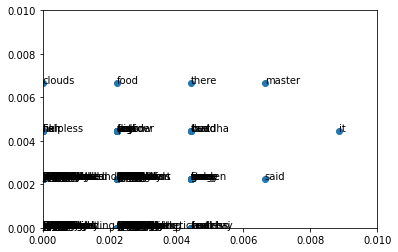

In [ ]:
# Plot Chatgpt vs Google
dtm_T.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()
plt.scatter(dtm_T.Google, dtm_T.Chatgpt)
plt.xlim(0, 0.010)
plt.ylim(0, 0.010)

for i, txt in enumerate(dtm_T.words):
    ax.annotate(txt, (dtm_T.Google[i], dtm_T.Chatgpt[i]))

In [ ]:
dtm_T['Formal_over_Chatgpt'] = dtm_T.Formal - dtm_T.Chatgpt
dtm_T.sort_values('Formal_over_Chatgpt', ascending=False, inplace=True)
dtm_T = dtm_T.rename_axis(None, axis = 1)
dtm_T.head(10)


,words,words,words,Google translate.txt,chatgpt.txt,formal English translation.txt,Google,Chatgpt,Google_over_Chatgpt,Chatgpt_over_Google,formal,Formal,Formal_over_Chatgpt
55,636,610,sanzang,1,0,2,0.002212,0.0,0.002212,-0.002212,0.004338,0.004338,0.004338
321,574,575,your,0,0,2,0.000000,0.0,0.000000,0.000000,0.004338,0.004338,0.004338
352,499,496,fingers,0,0,2,0.000000,0.0,0.000000,0.000000,0.004338,0.004338,0.004338
286,432,430,u8722,0,0,2,0.000000,0.0,0.000000,0.000000,0.004338,0.004338,0.004338
43,672,671,close,1,0,2,0.002212,0.0,0.002212,-0.002212,0.004338,0.004338,0.004338
320,575,576,air,0,0,2,0.000000,0.0,0.000000,0.000000,0.004338,0.004338,0.004338
359,527,525,swaying,0,0,1,0.000000,0.0,0.000000,0.000000,0.002169,0.002169,0.002169
374,520,518,stay,0,0,1,0.000000,0.0,0.000000,0.000000,0.002169,0.002169,0.002169
375,519,517,sticks,0,0,1,0.000000,0.0,0.000000,0.000000,0.002169,0.002169,0.002169
376,518,516,stylish,0,0,1,0.000000,0.0,0.000000,0.000000,0.002169,0.002169,0.002169


Articulate what differences (if any) you notice and whether this comports with a theory of why these bags of words should be similar or different.

Theory:
*   Google's word choice is richer than Chatgpt.
*   Since formal translation sees the full picture of the story, it is reflects more details in the story. In another word, both Google and Chatgpt use more general words, and formal translation uses more context specific words.

The result shown by comparisons reflects the theory above. The words that often used by Google, such as: nunnery and HuaZhai, are more complex than the words often used by Chatgpt, such as: clouds and food. Perhaps Google has a deeper understanding of the Chinese language and can generate more context from each word. When they choose their words in translation, they not only try to choose words with similar meanings, but also word that are used under simialr circumstances. The novel, *Journey to the West*, has a reglious background, so Google chooses words like "nunnery" and "HuaZhai". Yet, this is not perfect, "nunnery" is often used in Catholic context while "HuaZhai" often shows up in novels influenced by Chinese Buddaism.

Similar to what is suggested by the theory, the formal translation has more specific words. The selected text describes that the main character saw many beautiful woman-like monsters while they are on their way to get food. The formal translation uses words like "swaying" and "stylish" to accurately portrays the beauty of the monsters. Note that the descriptions in the novel are metaphoric and indirect. With a word-by-word direct translation, the reader will not know that the monsters are beautiful.

In [ ]:
# Correlation pearson
new = new_df.transpose()
new.corr(method='pearson')

translation,Google translate.txt,chatgpt.txt,formal English translation.txt
translation,,,
Google translate.txt,1.000000,0.118416,-0.037665
chatgpt.txt,0.118416,1.000000,0.027152
formal English translation.txt,-0.037665,0.027152,1.000000


After removing stop-words and with stemmed words, the correlation coefficient between Google and Chagpt is 0.12, the correlation coefficient between Google and formal translation is -0.04, the correlation coefficient between Chatgpt and formal translation is 0.03. Google and Chatgpt's translation is more simialr to each other than to the formal translation.  


In [ ]:
# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(new.T)


array([[1.        , 0.55770881, 0.49569602],
       [0.55770881, 1.        , 0.52879282],
       [0.49569602, 0.52879282, 1.        ]])

After removing stop-words and with stemmed words, the cosine similarity between Google and Chagpt is 0.56, the cosine similarity between Google and formal translation is 0.50, the cosine similarity between formal translation and Chagpt is 0.53. Cosine similarity reflects a similar pattern as Pearson r. Google and Chatgpt translation are more similar to each other than to the formal translation.

In [ ]:
#Chi-sq test of Google and formal translation
dtm_cont = pd.crosstab(new['Google translate.txt'], new['formal English translation.txt'])
chi2_stat, p_val, dof, ex = sp.stats.chi2_contingency(dtm_cont.values)
chi2_stat, p_val

(154.83747921089224, 1.917743561008937e-29)

After removing stop-words and with stemmed words, the chi-squared test suggests that Google and formal translation are distinct(super small p-value anf large chi-squared value).

In [ ]:
#Chi-sq test of Chatgpt and formal translation
dtm_cont = pd.crosstab(new['chatgpt.txt'], new['formal English translation.txt'])
chi2_stat, p_val, dof, ex = sp.stats.chi2_contingency(dtm_cont.values)
chi2_stat, p_val

(53.212726469972125, 1.063068249484377e-09)

After removing stop-words and with stemmed words, the chi-squared test suggests that Chatgpt and formal translation are distinct (super small p-value anf large chi-squared value).

In [ ]:
#Chi-sq test of Google and Chatgpt
dtm_cont = pd.crosstab(new['Google translate.txt'], new['chatgpt.txt'])
chi2_stat, p_val, dof, ex = sp.stats.chi2_contingency(dtm_cont.values)
chi2_stat, p_val

(163.53526775205665, 9.989378755372222e-29)

Even though Pearson r suggests that Chatgpt and Google translation are similar to each other than to the formal translation. After removing stop-words and with stemmed words, the chi-squared test suggests that Chatgpt and formal translation are distinct (super small p-value anf large chi-squared value).

In [ ]:
# Regression models
dtm_T2 = new.drop(["formal English translation.txt"], axis = 1)
dtm_T2 = new.rename(columns={'Google translate.txt': 'Google', 'chatgpt.txt': 'Chatgpt'})

from statsmodels.regression.linear_model import OLS

m1a = OLS.from_formula('Google ~ Chatgpt', data=dtm_T).fit()
m1a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Google   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     11.14
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           0.000887
Time:                        15:49:03   Log-Likelihood:                 4119.0
No. Observations:                 785   AIC:                            -8234.
Df Residuals:                     783   BIC:                            -8225.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0011   6.44e-05     17.437      0.000       0.001       0.001
Chatgpt        0.1192      0.036      3.337      0.001       0.049       0.189
==============================================================================
Omnibus:                       44.066   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.969
Skew:                           0.554   Prob(JB):                     5.19e-12
Kurtosis:                       3.600   Cond. No.                         785.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On average, knowing which words Chatgpt used frequently helps us to predict Google's words with up to 1.4% more accuracy.

In [ ]:
# One more big thing
# Sentiment analysis

from textblob import TextBlob
for d in ppwords:
    d = TextBlob(d)
    print(d.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)


Through sentiment analysis, I want to check whether the word selection of Chatgpt and Google translation properly pass on the level of polarity in the original text.

The word choice of all types of translation is neutral. This is reasonable because the selected section of text is not emotional rich at all, and contains more descriptions from the story teller's perspective (3rd person). It is a good thing that both Chatgpt and Google didn't add any polarity to the story.   

Extra credit: do some wordclouds of your texts

In [ ]:
files = ['Google translate.txt', 'chatgpt.txt', 'formal English translation.txt']
paper_words = {}

for d in files:
    file_path = '/content/' + str(d)
    with open(file_path, 'rb') as f:
        f = [f.read().decode('latin8', 'ignore')]
        #f = [f.read().decode('utf8', 'ignore').replace('\r\n', " ").replace('\ufeff', '')]
        paper_words[d] = f

In [ ]:
!pip install shorttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(-0.5, 399.5, 199.5, -0.5)

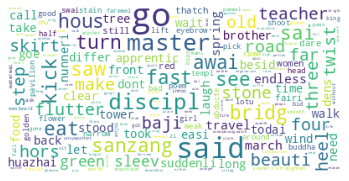

In [ ]:
# Wordclouds
from shorttext.utils import standard_text_preprocessor_1
preprocessor1 = standard_text_preprocessor_1()

# get corpus into the right format to be preprocessed
docids = sorted(paper_words.keys())
addresses = [a for docid in docids for a in paper_words[docid]]

# apply preprocessing
corpus = [preprocessor1(a).split(' ') for a in addresses]

# remove empty characters
corpus = [[w for w in d if w not in ['', '\n', '\r\n', '\ufeff']] for d in corpus]

from wordcloud import WordCloud
Google = ' '.join(corpus[0])
m_wordcloud = WordCloud(background_color="white", max_font_size=40).generate(Google)
plt.imshow(m_wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

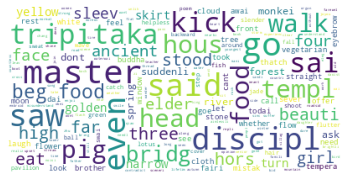

In [ ]:
Chatgpt = ' '.join(corpus[1])
m_wordcloud = WordCloud(background_color="white", max_font_size=40).generate(Chatgpt)
plt.imshow(m_wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

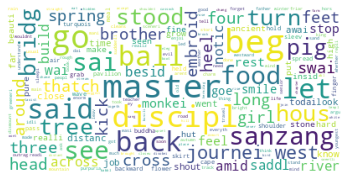

In [ ]:
Formal = ' '.join(corpus[2])
m_wordcloud = WordCloud(background_color="white", max_font_size=40).generate(Formal)
plt.imshow(m_wordcloud)
plt.axis("off")

In [ ]:
%%shell
jupyter nbconvert --to html /content/Lab_2.ipynb

[NbConvertApp] Converting notebook /content/Lab_2.ipynb to html
[NbConvertApp] Writing 1100773 bytes to /content/Lab_2.html
